In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

import sys

import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('..')
from env_config import DATA_PATH
from utils import *
from data import *

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100
sns.set(style='whitegrid')
pd.set_option('mode.chained_assignment', None)

In [4]:
kids_x_sdss = process_kids(os.path.join(DATA_PATH, 'KiDS/DR4/KiDS.DR4.x.SDSS.DR14.fits'), sdss_cleaning=True,
                           columns=COLUMNS_KIDS_ALL+COLUMNS_SDSS, update_kids=True)

Data shape: (152244, 49)
Droping NANs: 130777 (85.90%) left
Cleaning SDSS: 122964 left


In [5]:
# Pick galaxies
# Get magntiudes vs z correlations
kids_x_sdss.shape

(122964, 147)

In [7]:
data_galaxy = kids_x_sdss.loc[kids_x_sdss['CLASS'] == 'GALAXY']

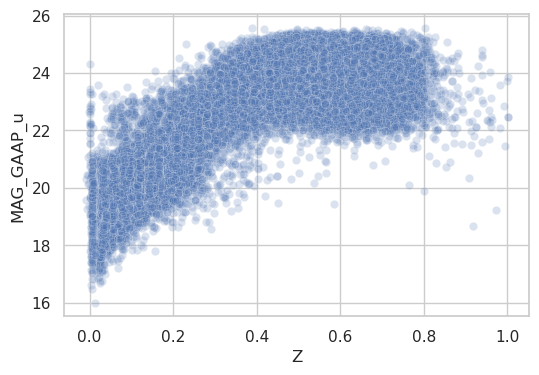

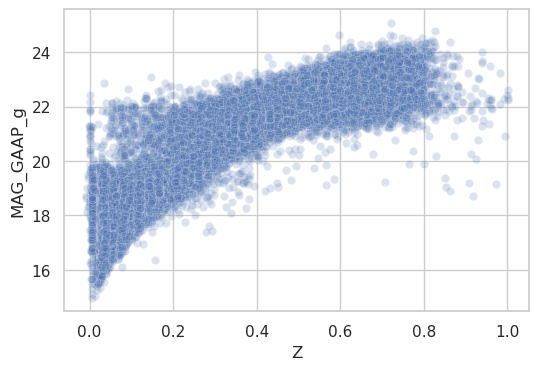

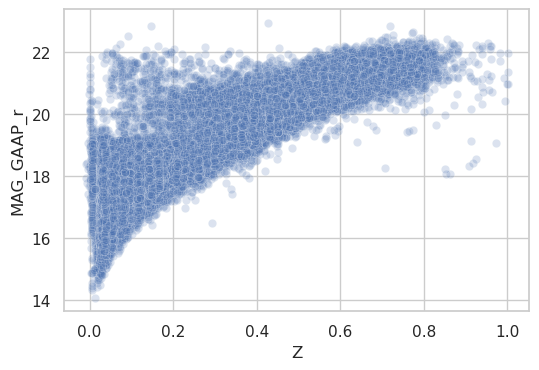

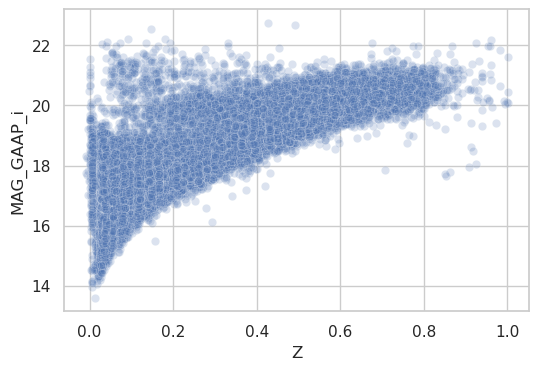

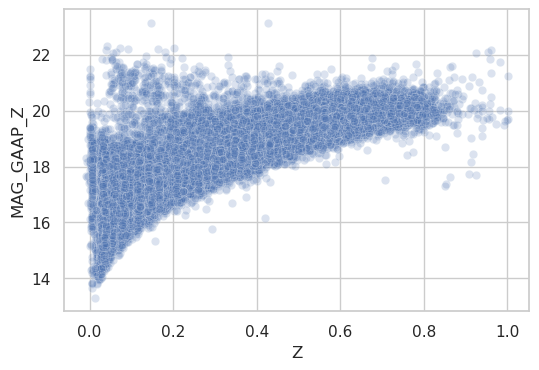

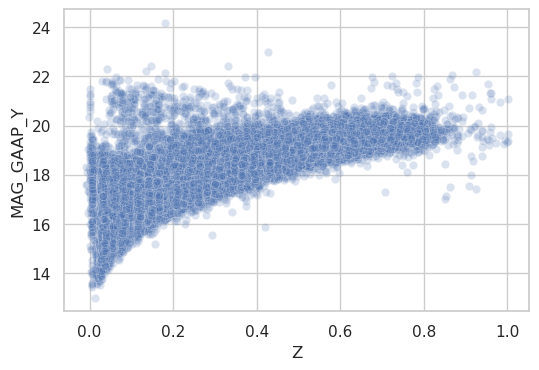

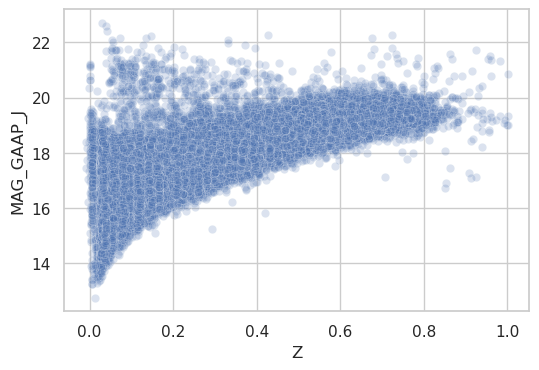

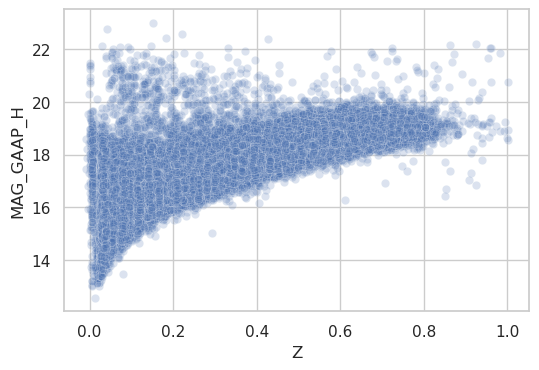

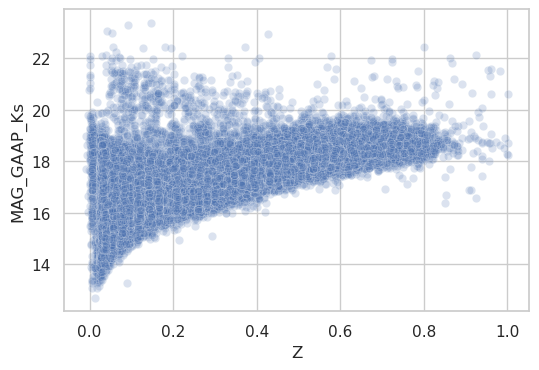

In [15]:
for mag in ['u', 'g', 'r', 'i', 'Z', 'Y', 'J', 'H', 'Ks']:
    plt.figure()
    sns.scatterplot(x='Z', y='MAG_GAAP_{}'.format(mag), data=data_galaxy, alpha=0.2)

In [19]:
for mag in ['u', 'g', 'r', 'i', 'Z', 'Y', 'J', 'H', 'Ks']:
    print('{}: {}'.format(mag, scipy.stats.pearsonr(data_galaxy['MAG_GAAP_{}'.format(mag)], data_galaxy['Z'])))

u: (0.8924795911679658, 0.0)
g: (0.9457961075478488, 0.0)
r: (0.9325936442687363, 0.0)
i: (0.9054702859974437, 0.0)
Z: (0.8867351024189363, 0.0)
Y: (0.8754712112716603, 0.0)
J: (0.8595644663396009, 0.0)
H: (0.8334556014469009, 0.0)
Ks: (0.7842378181873122, 0.0)


In [24]:
for mag in ['u', 'g', 'r', 'i', 'Z', 'Y', 'J', 'H', 'Ks']:
    print('{}: {}'.format(mag, data_galaxy['MAGERR_GAAP_{}'.format(mag)].mean()))

u: 0.2227313071489334
g: 0.021586228162050247
r: 0.005827565677464008
i: 0.009525744244456291
Z: 0.006554620340466499
Y: 0.010230699554085732
J: 0.0071970559656620026
H: 0.012251595966517925
Ks: 0.011423272080719471


In [25]:
data_qso = kids_x_sdss.loc[kids_x_sdss['CLASS'] == 'QSO']

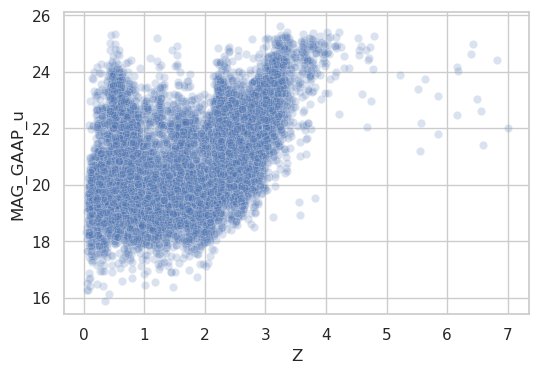

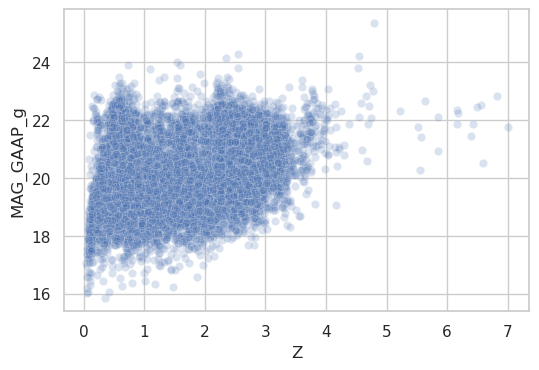

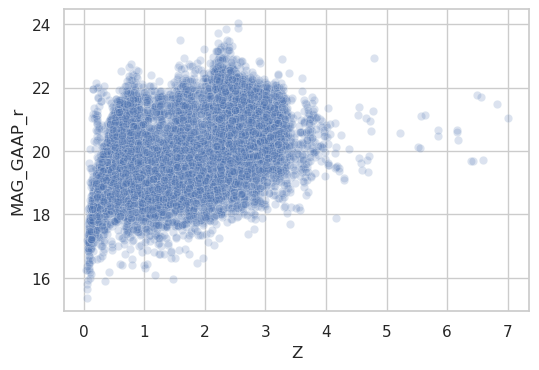

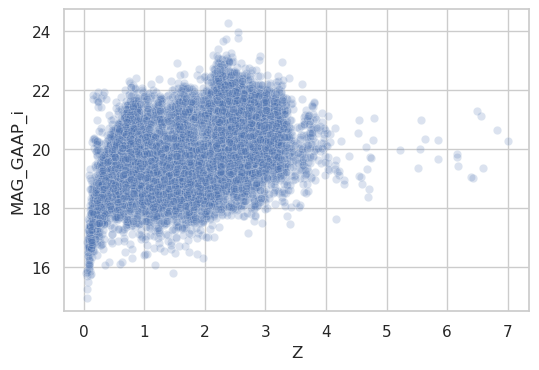

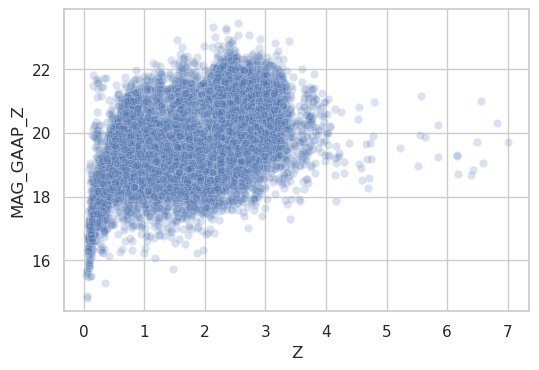

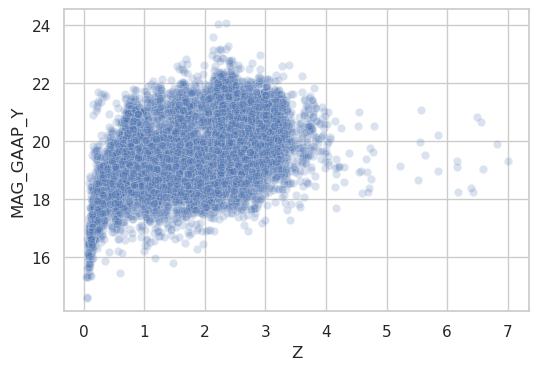

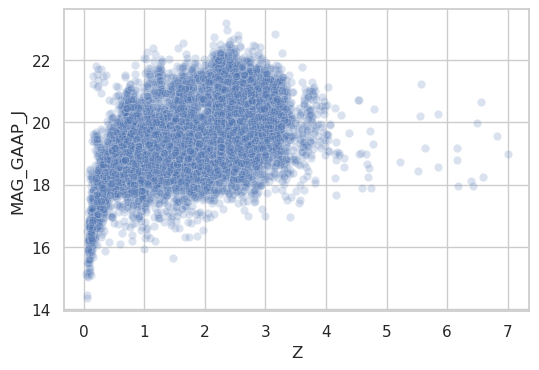

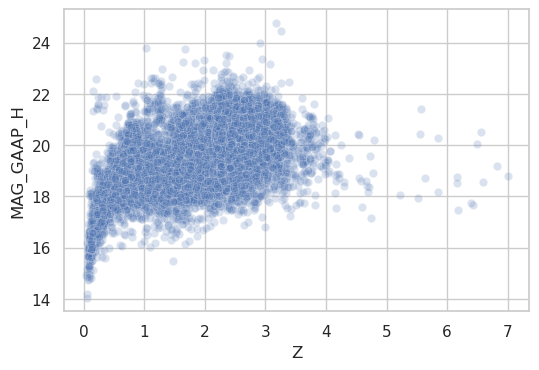

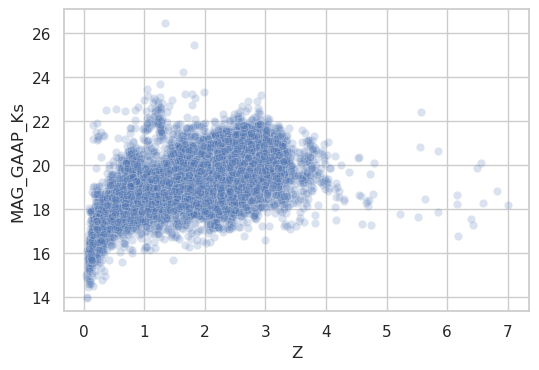

In [26]:
for mag in ['u', 'g', 'r', 'i', 'Z', 'Y', 'J', 'H', 'Ks']:
    plt.figure()
    sns.scatterplot(x='Z', y='MAG_GAAP_{}'.format(mag), data=data_qso, alpha=0.2)